# Bootstrap distribution for hypothesis testing

Las distribuciones *bootstrap* están, por definición, centradas en el estadístico elegido. Sin embargo, como asumimos que la **hipótesis nula** es cierta, la distribución estará centrada en el valor *nulo*. Por tanto el **p-valor** se define como la proporción de simulaciones que, al menos, son tan favorables a la hipótesis alternativa como al estadístico observado

Graphical representation

![bootstrap](img/bootstrap.png)


Empezamos con nuestra distribución bootstrap, la cual está siempre centrada alrededor del parámetro estadístico deseado (sample statistic) Entonces desplazamos esta distribución hasta el centro del valor nulo y calculamos el p-valor, siendo este la proporción de las simulaciones que son al menos tan extremas como el estadístico observado.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn style
sns.set()

# my functions
import sys
sys.path.insert(0, '../statistics/')

import bootstrap
import permutations_replicate as perm
from diff_means import diff_of_means

In [25]:
data = pd.read_csv('data/manhattan.csv')
data.shape

(20, 1)

## Comprobación de la media del precio de un apartamento en Manhattan

Let's turn our attention to Manhattan apartments. We would like to evaluate whether these data provide evidence that the median rent of 1 BR apartments in Manhattan is greater than $2,500.

* $H_{0}$: la media es 2500
* $H_{1}$: la media es superior a 2500

In [3]:
bs_median = bootstrap.draw_bs_reps(data=data['rent'].values,
                       func=np.median, size=15000)
np.mean(bs_median), data['rent'].mean(), np.median(bs_median)

(2382.5691333333334, 2625.8, 2350.0)

Como vemos, el valor de la hipóstesis nula está entre las medias del conjunto de datos y del conjunto *bootstrap*.

Vamos visualizar estos datos:

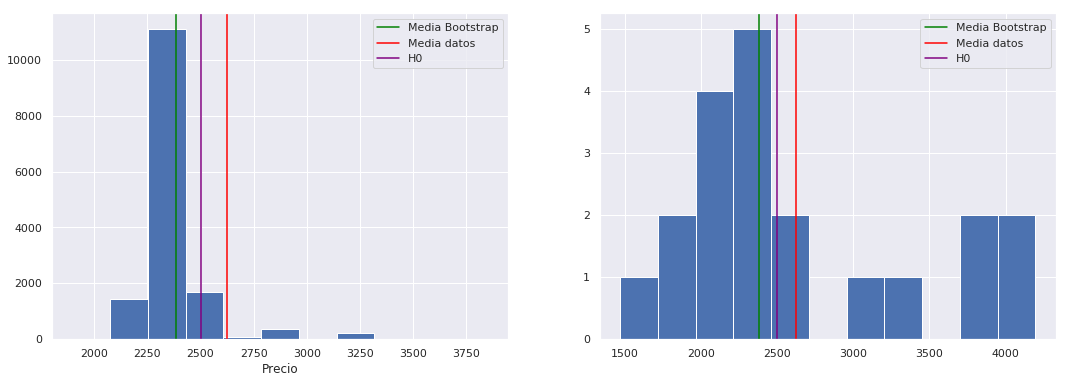

In [28]:
# figure
plt.figure(figsize=(18,6))
plt.subplot(121)

# distribución de los datos
plt.hist(bs_median, bins=11)

# Datos
plt.axvline(x=bs_median.mean(), color='green', label='Mediana Bootstrap')
plt.axvline(x=data['rent'].mean(), color='red', label='Media datos')
# Hipótesis nula
plt.axvline(x=2500, color='purple', label='H0')
plt.xlabel("Precio")
plt.legend()

plt.subplot(122)
plt.hist(data['rent'].values, bins=11) # distribución de los datos
# Datos
plt.axvline(x=bs_median.mean(), color='green', label='Mediana Bootstrap')
plt.axvline(x=data['rent'].mean(), color='red', label='Media datos')
plt.axvline(x=2500, color='purple', label='H0') # Hipótesis nula
plt.legend()

plt.show()

Como hemos dicho anteriormente, las distribuciones *bootstrap* se diseñan centradas en el estadístico elegido. Sin embargo, si asumimos que la *hipótesis nula* $H_0$ es cierta, podemos mover la distribución para que esté centrada en el valor nulo.

Recordamos:
* $H_{0}$: la media es 2500
* $H_{1}$: la media es superior a 2500

Por tanto, vamos a mover la distribución para que esté centrada en el valor de $H_0$ que está marcado con una línea vertical morada.

In [5]:
# centramos los valores
differences = 2500 - np.mean(bs_median)
bs_median_centered = bs_median + differences

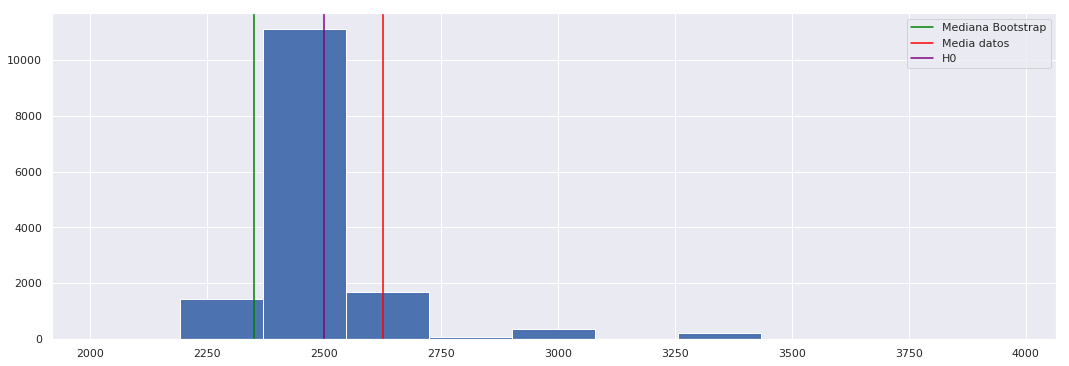

In [31]:
# dibujamos los valores ya re-centrados
plt.figure(figsize=(18,6))
plt.hist(bs_median_centered, bins=11) # distribución de los datos
plt.axvline(x=np.median(bs_median), color='green', label='Mediana Bootstrap')  # Valor obtenido mediante bootstrap
plt.axvline(x=data['rent'].mean(), color='red', label='Media datos') # Valor dado por el dataset
plt.axvline(x=2500, color='purple', label='H0') # Hipótesis nula
plt.legend()
plt.show()

Por último comprobamos la probabilidad de obtener un valor tan extremo como el valor obtenido. Para ello sumaremos los valores obtenidos que estén por debajo del valor obtenido mediante bootstrapping.

In [7]:
np.sum(bs_median_centered < np.median(bs_median)) / len(bs_median_centered)

0.06146666666666667

No rechazamos la hipótesis nula $H_0$ debido a que el **p-valor** está por encima del nivel de significancia, y concluimos que los datos no proporcionan evidencia convincente de que el alquiler medio de los apartamentos no sea $2500

## Percentile and standard error for bootstrap confidence intervals

En el gráfico anterior tenemos una representación de cada una de las medianas calculadas realizando *bootstraping*. Recordamos que un bootstrap sample es un conjunto de datos del mismo tamaño que el original, cuyos datos se obtienen del original con reemplazo.

Usando la *distribución* de datos procedente del *bootstraping*, podemos calcular el intervalo de confianza de dos formas distintas.

### Intervalos de confianza mediante los percentiles

Seleccionamos los percentiles 5th y 97.5th de la distribución *bootstrap* para obtener hasta el 95% de la información.

In [8]:
# percentile method
error01, error02 = np.percentile(bs_median, q=[0.05, 97.5])
error01, error02

(2035.964, 2875.0)

### Intervalos de confianza mediante SE

Para calcular SE (standard error) simplemente calculamos la desviación estándar de la distribución *bootstrap*.

In [9]:
# standard error method

# valor crítico
t_star = ss.t.ppf(q=0.975, df=data.shape[0] - 1)

# interval
error = np.std(bs_median)

error0 = np.median(bs_median) + t_star * error
error1 = np.median(bs_median) - t_star * error

# view
print(error0)
print(error1)

2695.221332153459
2004.7786678465409


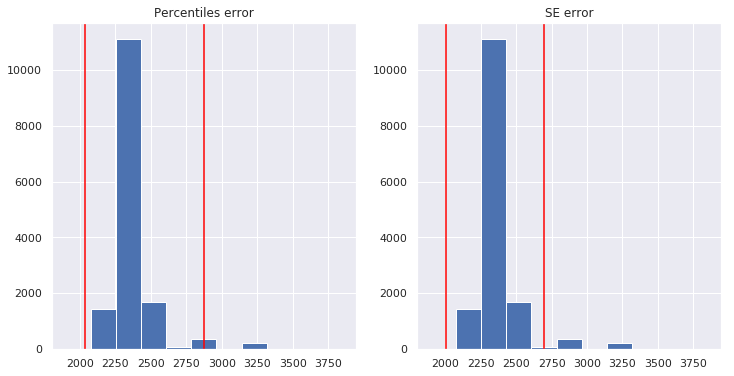

In [32]:
# visualizamos
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Percentiles error")
plt.hist(bs_median, bins=11)
plt.axvline(x=error01, color='red')
plt.axvline(x=error02, color='red')

plt.subplot(1,2,2)
plt.title("SE error")
plt.hist(bs_median, bins=11)
plt.axvline(x=error0, color='red')
plt.axvline(x=error1, color='red')
plt.show()

## Fuerza de la lengua de distintas ranas

Vamos a analizar la fuerza de tres ranas con diferentes edades y medir su fuerza. Comprobaremos si la fuerza depende de la edad de la rana o bien es independiente.

In [11]:
# Importamos el set de datos
#dataset = pd.read_csv('data/pennsylvania2012.csv', header=0)
datafrog = pd.read_csv('../Datasets/frog_tongue(update).csv')

# Seleccionamos la información conveniente del datafrog
force_frog = datafrog.loc[:,['ID', 'impact force (mN)']]

# Pequeña visualización de los datos
#dataset.head()
force_frog.head()

,ID,impact force (mN)
0,I,1205
1,I,2527
2,I,1745
3,I,1556
4,I,493


Como podemos ver a continuación, los datos obtenidos nos sugieren que la fuerza de ataque de la rana (de la lengua) depende de la edad de la rana.

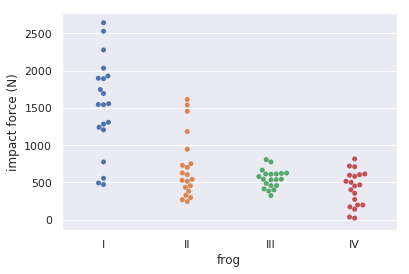

In [12]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact force (mN)', data=force_frog)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Vamos a seleccionar las ranas II y IV y convertiremos las unidades de mN a N. Posteriormente calcularemos la diferencia entre sus medias.

In [13]:
# Seleccionamos la rana y su fuerza
force_a = force_frog[force_frog.loc[:,'ID'] == 'II']['impact force (mN)'].values/1000
force_b = force_frog[force_frog.loc[:,'ID'] == 'IV']['impact force (mN)'].values/1000

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)
empirical_diff_means

0.28825000000000006

Es posible que, en realidad, las ranas ataquen con la misma fuerza y esta diferencia observada es fruto del azar. Para comprobar esto, vamos a calcular la probabilidad de obtener al menos una diferencia de $0.29 N$ en la fuerza de ataque media bajo la **hipótesis** de que las **distribuciones** de las fuerzas de ataque para las dos ranas son **idénticas**. Utilizaremos una prueba de permutación, con un estadístico de prueba que será *la diferencia de medias* para probar esta hipótesis.

Calculamos la diferencia de las medias. Posteriormente realizamos permutaciones, (unas 10.000) y calculamos la diferencia de medias por cada permutación, onteniendo 10.000 valores.

La permutación realiza el siguiente proceso:

* Junta o une los datos en un solo array
* Realiza una permutación de los datos
* Divide los datos en el tamaño original
* Realizamos la diferencia de las medias

Este proceso se repite el número de veces que le hayamos indicado. En este caso obtendremos 10.000 diferencias de medias.

In [14]:
# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = perm.draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

Pequeña muestra de los datos obtenidos. Como vemos, hay datos que se acercan a 0.29 N pero la mayoría parece estar alrededor de cero.

In [15]:
perm_replicates[0:5]

array([0.05345, 0.04195, 0.00745, 0.03455, 0.00665])

In [16]:
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0099


#### Resultados

El **p-valor** nos ha salido menor que $0.05$ por tanto la probabilidad de que la diferencia de $0.29$ sea debida al azar es muy pequeña, y debemos rechazar esta **hipótesis**